In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [3]:
table = np.genfromtxt('DMs_EDD.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod   = table['Vmod']

DM_edd  = table['DMr_TFgz_Cgz']
dDM_edd = table['dDMr_TFgz']


DM_edd  = table['DMi_Cgi']
dDM_edd = table['dDMi']


DM_edd  = table['DMz']
dDM_edd = table['dDMz']

ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

I = iii-DM_edd
W1 = w11-DM_edd
print len(pgc_edd)

10736


In [4]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']


# # table = pd.read_fwf('DMi_V_m17rev.6616.spgc')
# # table = pd.read_fwf('DMW1_V_m161rev.5065.spgc')

# table = pd.read_fwf('DMriz_V_m17.6768.adj.head')

# pgc_b = np.asarray(table['PGC'])
# # Vmod = np.asarray(table['Vmod'])

# pgc_b.shape

# # for i, idd in enumerate(pgc_b):
# #     print i, idd

In [5]:
logD = (DM_edd-25)/5.
logH = np.log10(Vmod) - logD  

keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop:
        
        keep[i] = 1
    else:
        p+=1

        
print p

473


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [6]:
Vmod

array([4786, 4154, 6297, ..., 2752, 7005, 4745])

5054
C[0]*P = 2.1939305591445135e-05
108.2 75.95590674870486
325.4017857142857 78.47574487587943
565.5999999999999 81.19256989615603
858.3333333333334 78.93516187543433
76.01900864589066
[2.19393056e-05 1.88092220e+00]


/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


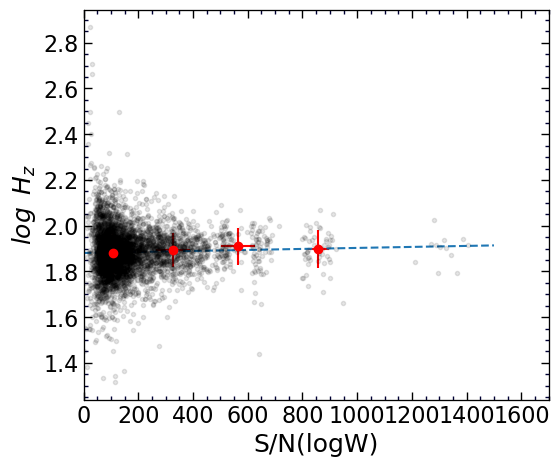

In [7]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>10) & (I<-17) & (zzz>10)  & (rrr>10)
                 & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

X0 = logWimx[indx]
print len(X0)
X  = logWimx_e[indx]
Ye = 0.2*dDM_edd[indx]
V  = Vmod[indx]
Y  = logH[indx]
ax.set_xlim(0,1700)
# ax.set_ylim(1.2,2.6)

P = X0/X

v = np.linspace(0,1500,50)


c = np.polyfit(P,Y, 1, w=1./Ye**2)

# Y  = logH[indx] - (c[0]*P)

print 'C[0]*P =',   c[0]

c = np.polyfit(P,Y, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')
ax.plot(P, Y, 'k.', alpha=0.1)

XL = []
YL = []
YLe = []
for i in np.arange(0,1000,250):
    xp = []
    yp = []
    for ii in range(len(P)):
        xi = P[ii]
        if xi>=i and xi<i+250:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('S/N(logW)', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 



set_axes(ax)
Y  = logH[indx] - (c[0]*P)

print 10**c[1]
print c

C=  [-0.20364944  1.88302888]
Median =  1.8798445293447
0.007 77.11437132852049
0.015 76.067974475074
0.024 74.89222571293814
0.034 73.7876879365288
0.043 78.57898453321599
0.054 80.37052666433216
0.062 77.5538230253553
0.074 70.94595631800034
76.38865863869958
[-0.20364944  1.88302888]


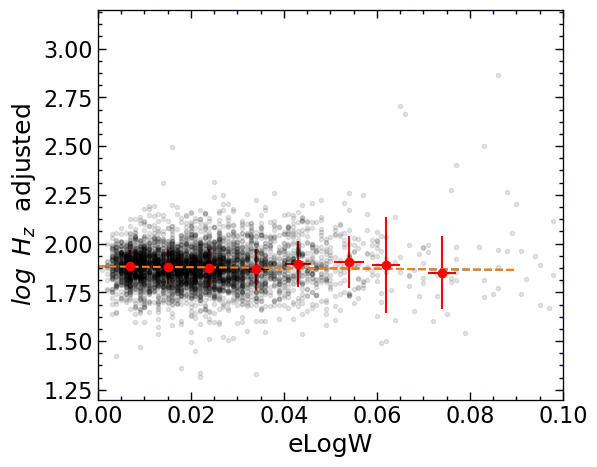

In [8]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (iii>10) & (I<-17) & (zzz>10)  & (rrr>10)
#                  & (Sqlt>3) & (keep==1))

# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (w11>10) & (Wqlt>3) & 
#                  (keep==1) & (W1>-16.1))

ax.set_xlim(0,0.1)
ax.set_ylim(1.2,3.2)
v = np.linspace(0,0.09,50)

xx = X
yy = Y
c = np.polyfit(xx, yy, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')

# print c
# Y  = Y - (c[0]*X+c[1]) + np.median(yy)

print 'C= ', c
print 'Median = ', np.median(yy)


c = np.polyfit(X,Y, 1, w=1./Ye**2)

ax.plot(X, Y, 'k.', alpha=0.1)
ax.plot(v,c[0]*v+c[1], '--')


XL = []
YL = []
YLe = []
for i in np.arange(0,0.08,0.01):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.01:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('eLogW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$'+'  adjusted', fontsize=18) 





set_axes(ax)

# x_ax, y_ax = set_axes(ax, (0, 0.1), (45,110), fontsize=12) 

# ax.set_yscale('log')

# from matplotlib.ticker import MultipleLocator

# from matplotlib.ticker import NullFormatter
# ax.yaxis.set_major_formatter(NullFormatter())  
# ax.yaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(5))

# plt.yticks([50,60,70,80,90,100,110], ('50','60','70','80','90','100','110'))
# ax.set_yticks(np.arange(50,120, step=10))


print 10**c[1]
print c

In [9]:
# print len(Y)

# X0 = logWimx[indx]
# X  = logWimx_e[indx]
# Ye = 0.2*dDM_edd[indx]
# V  = Vmod[indx]
# Y  = logH[indx]


# plt.plot(V, X0, '.')
# plt.plot(X0/X, Y, '.', alpha=0.2)
# plt.plot(DM_edd[indx], Y, '.', alpha=0.2)

In [10]:
print X

[0.011 0.025 0.025 ... 0.01  0.028 0.031]


2.149 80.4372253896011
2.327 75.07873114268727
2.503 76.83074205093627
2.659 74.71686551351708
2.818 67.5750988374674
[-0.01249268  1.91136733]


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa0d968f050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0d973f390>)

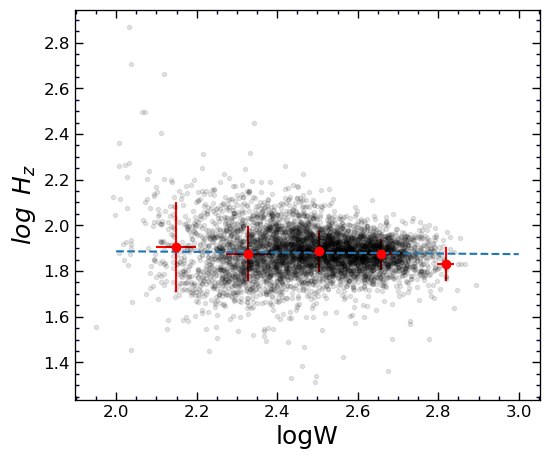

In [11]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = X0 

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(2,3,0.2):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.2:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('logW', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(2,3,50)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


print c

set_axes(ax, fontsize=12)


4596.0 73.57183151014264
5417.0 74.7296970946316
6618.0 75.70476103526602
7422.0 76.23249011042309
8481.0 76.20200040149831
9475.0 77.15454822049766
10533.0 75.98128857960776
11486.5 77.61861321450932
12425.0 77.05973887416427
13448.0 76.39089045158306
14410.0 78.86597404905424
15595.0 76.85843702668801
16567.0 87.03398678611194
17348.0 77.02954068605513
74.76928983241758 78.18067743750531


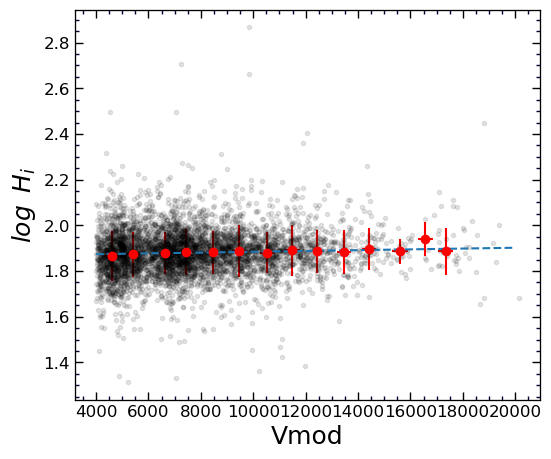

In [12]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


# indx, = np.where((logH<3.2) & (logH>0) & (Vmod>4000) & (logWimx_e<0.1) & (iii>10) & (I<-16) & (zzz>10) 
#                  & (Sqlt>3) & (keep==1))




# X0 = logWimx[indx]
# X  = logWimx_e[indx]
# Ye = 0.2*dDM_edd[indx]
# V  = Vmod[indx]
# Y  = logH[indx]





X = V

ax.plot(X, Y, 'k.', alpha=0.1)


# ix0 = np.where((X0>2.1) & (X0<2.2))
# ax.plot(X[ix0], Y[ix0], 'g.')
# ix0 = np.where(X0>2.8)
# ax.plot(X[ix0], Y[ix0], 'r.')


for i in np.arange(4000,18000, 1000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+1000:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_i$', fontsize=18) 

v = np.linspace(4000,20000,2000)
# c = np.polyfit(XL,YL, 1, w=1./np.asarray(YLe))
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')




set_axes(ax, fontsize=12)

print 10**(c[0]*4000.+c[1]), 10**(c[0]*15000.+c[1])


108.2 75.45057320612156
325.4017857142857 77.14771860401325
565.5999999999999 79.03664185329637
858.3333333333334 75.40209026848791
76.01900864589066
[-2.53806731e-18  1.88092220e+00]


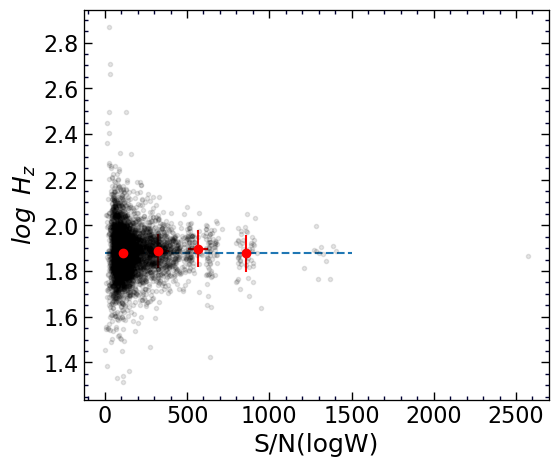

In [13]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)



v = np.linspace(0,1500,50)



c = np.polyfit(P,Y, 1, w=1./Ye**2)
ax.plot(v,c[0]*v+c[1], '--')
ax.plot(P, Y, 'k.', alpha=0.1)

XL = []
YL = []
YLe = []
for i in np.arange(0,1000,250):
    xp = []
    yp = []
    for ii in range(len(P)):
        xi = P[ii]
        if xi>=i and xi<i+250:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>10:
        sqN = np.sqrt(len(xp))
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)  
        print np.median(xp), 10**np.median(yp)
        XL.append(np.median(xp))
        YL.append(np.median(yp))
        YLe.append(np.median(np.std(yp/sqN)))

ax.set_xlabel('S/N(logW)', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 



set_axes(ax)
Y  = logH[indx] - (c[0]*P)

print 10**c[1]
print c

In [14]:
len(Y)

5054

In [15]:
len(iii[indx])

5054

-0.030000000000001137 71.78325040490999
0.07000000000000028 76.93474643976656
0.14000000000000057 77.25819790302059
0.22000000000000064 74.00589803019177
0.3200000000000003 78.18864508490057


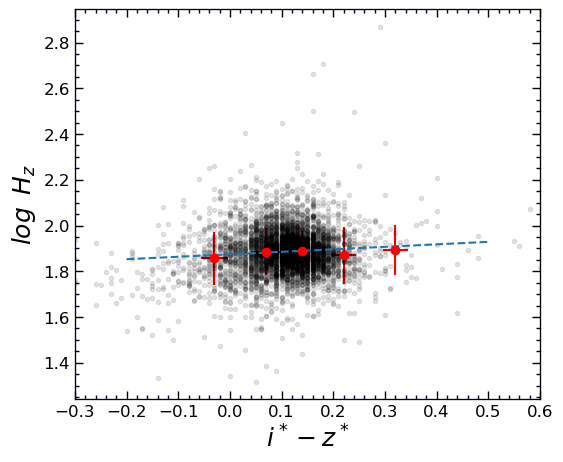

In [16]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = iii[indx]-zzz[indx]

ax.plot(X, Y, 'k.', alpha=0.1)

for i in np.arange(-0.1,0.4, 0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*-z^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(-0.2,0.5, 50)
c = np.polyfit(X,Y, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


ax.set_xlim(-0.3, 0.6)

set_axes(ax, fontsize=12)

Y1 = Y - (c[0]*(X)+c[1])+np.log10(73.11)

-0.030000000000001137 70.71050251588836
0.07000000000000028 73.82171877168564
0.14000000000000057 72.85154865789862
0.22000000000000064 68.35922690513317
0.3200000000000003 70.49695093766532


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa0c96cec50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0c975c990>)

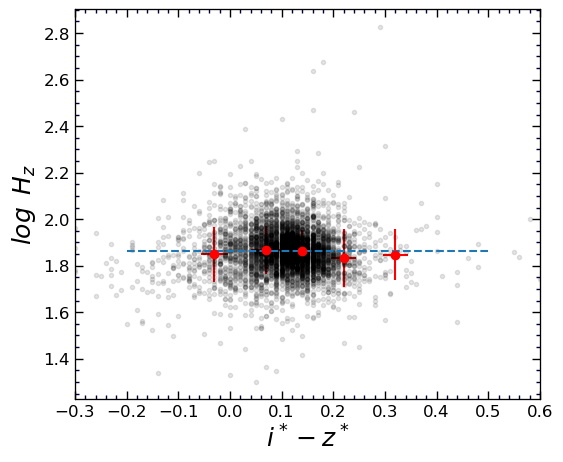

In [17]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = iii[indx]-zzz[indx]

ax.plot(X, Y1, 'k.', alpha=0.1)

for i in np.arange(-0.1,0.4, 0.1):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+0.1:
            xp.append(xi)
            yp.append(Y1[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel(r'$i^*-z^*$', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$', fontsize=18) 

v = np.linspace(-0.2,0.5, 50)
c = np.polyfit(X,Y1, 1, w=1./Ye)
ax.plot(v,c[0]*v+c[1], '--')


ax.set_xlim(-0.3, 0.6)

set_axes(ax, fontsize=12)



4948.0 71.14647847555753
7016.0 73.04553250403086
8922.0 73.30391563112109
10818.5 73.41290792163117
12681.5 73.28932337667545
14614.5 74.19243225058466
17148.0 74.04306598006646


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa0c938bb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa0d97cde50>)

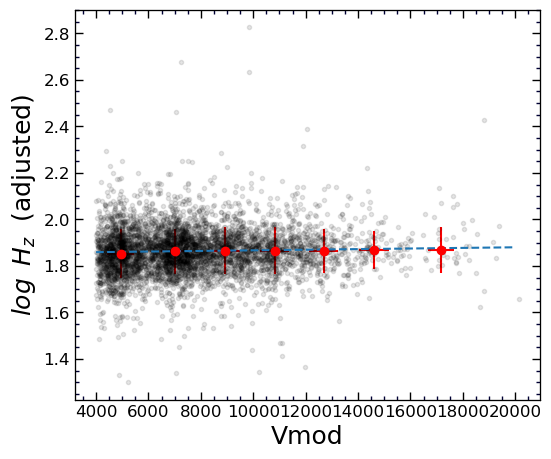

In [18]:
fig = py.figure(figsize=(5,5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.9, bottom=0.12, left=0.05, right=0.98)
ax = fig.add_subplot(111)


X = V

ax.plot(X, Y1, 'k.', alpha=0.1)

for i in np.arange(4000,18000, 2000):
    xp = []
    yp = []
    for ii in range(len(X)):
        xi = X[ii]
        if xi>=i and xi<i+2000:
            xp.append(xi)
            yp.append(Y1[ii])
    if len(xp)>0:
        ax.errorbar(np.median(xp), np.median(yp), yerr=np.std(yp), xerr=np.std(xp), fmt='o', 
                    color='r', ms=6)     
        print np.median(xp), 10**np.median(yp)

ax.set_xlabel('Vmod', fontsize=18) 
ax.set_ylabel(r'$log\/\/\/ H_z$'+'  (adjusted)', fontsize=18) 

v = np.linspace(4000,20000,2000)
c = np.polyfit(X,Y1, 1, w=1/Ye)
ax.plot(v,c[0]*v+c[1], '--')




set_axes(ax, fontsize=12)

